In [59]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing as pp
import statsmodels.formula.api as smf
import plotly as py
import plotly.graph_objects as go


In [4]:
##LOADING THE INSURANCE DATA SET
ins_charges = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [5]:
### DISPLAYING THE DATAFRAME
ins_charges.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [46]:
##FINDING THE SHAPE OF THE DF
print(ins_charges.shape)
display(ins_charges.describe())

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [7]:
### CHECKING THE NULL VALUES
ins_charges.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder
#TRANSFORMING CATEGORICAL VARIABLES INTO NUMERICAL
#SEX COLUMN
le = LabelEncoder()
le.fit(ins_charges.sex.drop_duplicates()) 
ins_charges.sex = le.transform(ins_charges.sex)
# smoker or not
le.fit(ins_charges.smoker.drop_duplicates()) 
ins_charges.smoker = le.transform(ins_charges.smoker)
#region
le.fit(ins_charges.region.drop_duplicates()) 
ins_charges.region = le.transform(ins_charges.region)
ins_charges.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [24]:
display(ins_charges.corr())


,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


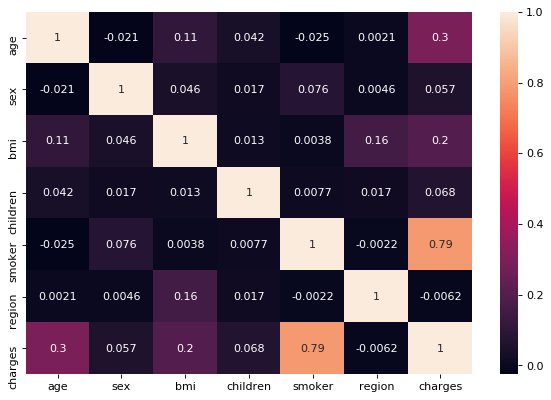

In [26]:
#setting the size of the figure
pl.figure(figsize=(9,6), dpi= 80)
#plotting the heatmap
sns.heatmap(ins_charges.corr(), annot=True)
pl.show()
###A strong correlation is observed only with the fact of smoking the patient

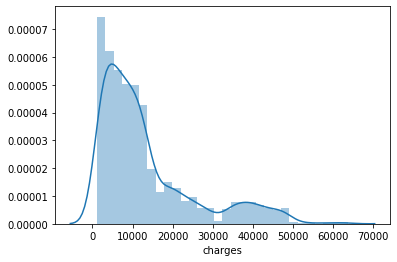

In [27]:
##First we will look into the distribution of our dependent variable, 'charges' to find out the average insurance charges
dist_charge = sns.distplot(ins_charges['charges'])
pl.show(dist_charge)

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

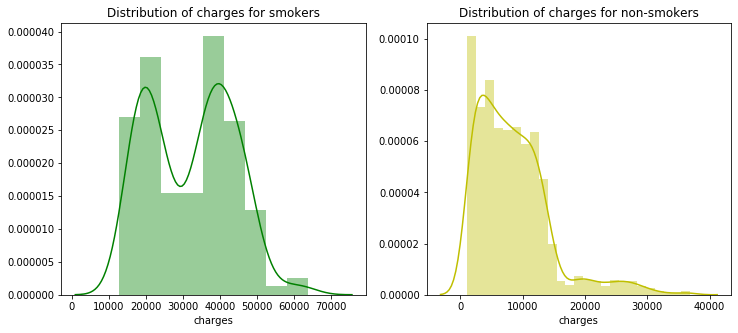

In [34]:
##Since the variable 'smoker' is most influencing factor we will analyze 'smoker' w.r.t 'charges' in detail
fig= pl.figure(figsize=(12,5))

ax=fig.add_subplot(121)
sns.distplot(ins_charges[(ins_charges.smoker == 1)]["charges"],color='g',ax=ax) ##ax - matplotlib axis
ax.set_title('Distribution of charges for smokers')

ax=fig.add_subplot(122)
sns.distplot(ins_charges[(ins_charges.smoker == 0)]['charges'],color='y',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

###FROM THE PLOTS WE CAN OBSERVE THAT THE CHARGES FOR NON-SMOKERS ARE LESS THAN THAT FOR SMOKERS

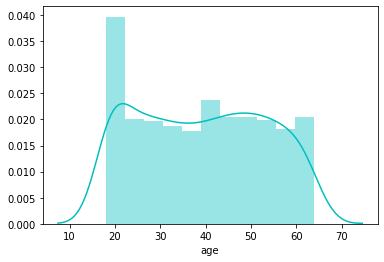

In [35]:
##The next prominent factor is age
##Firstly, we will check the distribution of age in our data
dist_age = sns.distplot(ins_charges['age'],color = 'c')
pl.show(dist_age)

##These days teenage smoking has become a norm..let's analyze how many entries below the age of 20 are smokers and have high charges

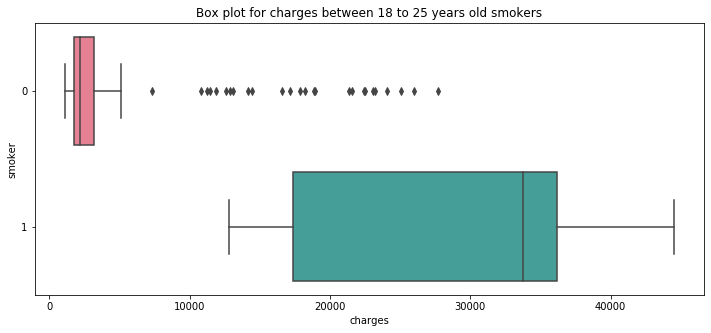

In [54]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges between 18 to 25 years old smokers")
sns.boxplot(y="smoker", x="charges", data = ins_charges[(ins_charges.age.between(18,25))] , orient="h", palette = 'husl')

###FROM THE BOXPLOT WE CAN NOTICE THAT BETWEEN THE AGE OF 18 TO 25 ,BEING A SMOKER EFFECTS THE CHARGES

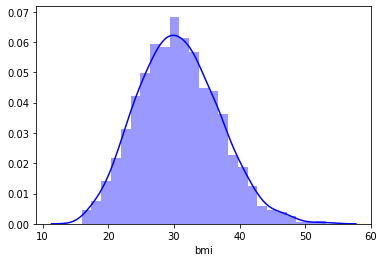

In [41]:
##The next factor is the BMI 
dist_bmi = sns.distplot(ins_charges['bmi'],color = 'b')
pl.show(dist_bmi)

Text(0.5, 1.0, 'Distribution of charges for obese people')

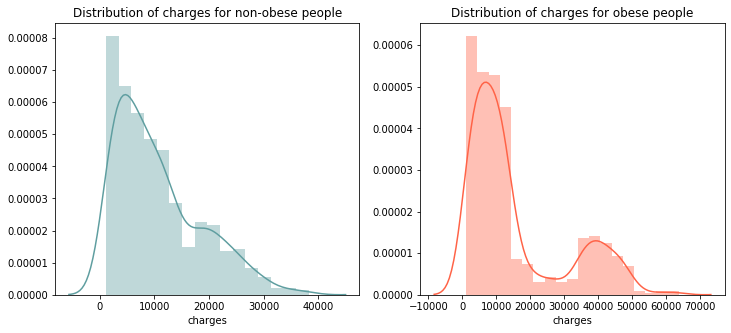

In [57]:
fig= pl.figure(figsize=(12,5))

ax=fig.add_subplot(121)
sns.distplot(ins_charges[(ins_charges.bmi < 30)]["charges"],color='cadetblue',ax=ax) ##ax - matplotlib axis
ax.set_title('Distribution of charges for non-obese people')

ax=fig.add_subplot(122)
sns.distplot(ins_charges[(ins_charges.bmi >= 30)]['charges'],color='tomato',ax=ax)
ax.set_title('Distribution of charges for obese people')


In [60]:
#separating x and y vsariables and leave out region since it has negative correlation with charges
x_var = ins_charges[['age',  'sex', 'bmi', 'children', 
       'smoker']]
y_var = ins_charges['charges']

#Creating the test and train data

x_train_ins, x_test_ins, y_train_ins, y_test_ins = train_test_split(x_var, y_var, test_size=0.4, random_state=101)
print(x_train_ins.shape)
print(y_train_ins.shape)
print(x_test_ins.shape)
print(y_test_ins.shape)

(802, 5)
(802,)
(536, 5)
(536,)


In [62]:
from sklearn.linear_model import LinearRegression
#creating an empty linear model (lm)
lm = LinearRegression()
#passing in the training and testing data to the model
lm.fit(x_train_ins,y_train_ins)
#predicting the variables 
predictions_ins = lm.predict(x_test_ins)
print(predictions_ins[:15])
print(y_test_ins[:15])

[10507.0713708   2757.43892632 10038.82888657 27660.15588862
  5996.33676789   219.21878935 14771.08091869  4754.61047853
 10761.87758062  7583.31695407  7788.60452048 11144.08789223
  7077.8932382  12113.7729007  31230.57500231]
44       6079.67150
134      2457.21115
980     25517.11363
618     34439.85590
1238     6985.50695
295      1704.56810
20      13228.84695
1297     4340.44090
365      9778.34720
670      4837.58230
1210     5373.36425
284      9625.92000
1083     4076.49700
115     30259.99556
793     21195.81800
Name: charges, dtype: float64


Text(0, 0.5, 'Predicted Charges')

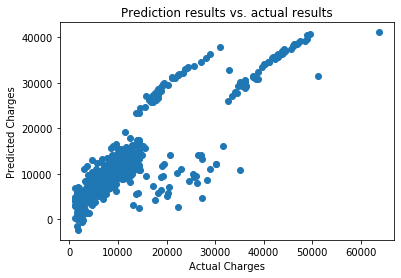

In [64]:
display(pl.scatter(y_test_ins,predictions_ins, ))
pl.title('Prediction results vs. actual results')
pl.xlabel('Actual Charges')
pl.ylabel('Predicted Charges')

In [65]:
##The mean squared error
print ("Mean squared error: %.1f" % mean_squared_error(y_test_ins, predictions_ins))

##the variance
print ('The Variance score: %.2f' % r2_score(y_test_ins, predictions_ins))

Mean squared error: 31728297.6
The Variance score: 0.77


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              799.2
Date:                Tue, 10 Dec 2019   Prob (F-statistic):                   2.13e-244
Time:                        01:04:04   Log-Likelihood:                         -5410.6
No. Observations:                 536   AIC:                                  1.083e+04
Df Residuals:                     531   BIC:                                  1.085e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          240.1486     16.757     14.332      0.000     207.231     273.066
sex         -926.6500    505.948     -1.832      0.068   -1920.556      67.256
bmi          -23.3317     24.656     -0.946      0.344     -71.767      25.104
children     293.7330    210.496      1.395      0.163    -119.774     707.240
smoker      2.395e+04    675.469     35.460      0.000    2.26e+04    2.53e+04
==============================================================================
Omnibus:                      114.332   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.950
Skew:                           1.052   Prob(JB):                     9.96e-67
Kurtosis:                       6.030   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

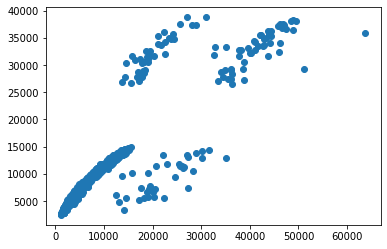

In [67]:
%matplotlib inline
import statsmodels.api as sm
model_ins = sm.OLS(y_test_ins, x_test_ins).fit()
display (model_ins.summary())
##Predictions by using the linear model ablone
predictions_ins = model_ins.predict(x_test_ins) 
pl.scatter(y_test_ins, predictions_ins)
